### Configuração de dados

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

test = pd.read_csv('C:\\Users\\Estrela\\Desktop\\Treino\\titanic\\test.csv')
train = pd.read_csv('C:\\Users\\Estrela\\Desktop\\Treino\\titanic\\train.csv')
gender_submission = pd.read_csv('C:\\Users\\Estrela\\Desktop\\Treino\\titanic\\gender_submission.csv')

In [2]:
# Função para promover agilidade em analises.

def analise(coluna):
    
    # Transformando lista de constantes únicas e suas quantidades em string.
    
    constantes_unicas = ''
    
    for i in range(len(list(coluna.value_counts()))):           
        if   (i == 0):
            constantes_unicas += str(list(coluna.value_counts())[i]) + ' "' + str(list(coluna.value_counts().index)[i]) + '",'
            
        elif (i == len(coluna.unique()) - 1):
            constantes_unicas += ' ' + str(list(coluna.value_counts())[i]) + ' "' + str(list(coluna.value_counts().index)[i]) + '"'
            
        else:
            constantes_unicas += ' ' + str(list(coluna.value_counts())[i]) + ' "' + str(list(coluna.value_counts().index)[i]) + '",'
    
    # Análise dos dados
    
    print(f'Existem {coluna.nunique()} constantes únicas que são {constantes_unicas} e {coluna.isna().sum()} dados faltantes.')

In [3]:
# Fazendo diferenciação e união de planilhas

test['Modify'] = 'test'
train['Modify'] = 'train'

df_final = pd.DataFrame()

df_create = pd.concat([test, train])

df_create.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Modify,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,test,NaN
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,test,NaN
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,test,NaN
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,test,NaN
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,test,NaN


### Passengerld

A coluna "Passengerld" apenas escala de forma crescente, com o intervalo de 1 unidade. Logo, fica claro 
que a lógica dela não têm nenhuma interferência no comportamento de outras colunas, e conseguentemente
também não influenciará na probabilidade do passageiro sobreviver ou não.

### Pclass

In [4]:
analise(df_create['Pclass'])

Existem 3 constantes únicas que são 709 "3", 323 "1", 277 "2" e 0 dados faltantes.


In [5]:
'''
Analisando a coluna, é nítido e notório que ela não precisa de nenhum tratamento estatístico de dados 
visto que existem poucas variáveis, e não nenhum dado faltantes.
'''

# Transformação das variáveis de "Pclass" em multiplas colunas que representam de forma binária os dados
# de cada uma delas.

Pclass = pd.get_dummies(df_create['Pclass'], prefix='Pclass')

df_final = Pclass

df_final.head(5)

,Pclass_1,Pclass_2,Pclass_3
0,0,0,1
1,0,0,1
2,0,1,0
3,0,0,1
4,0,0,1


### Name

In [6]:
'''
Casa passageiro possui um nome diferente, logo, não faz sentido fazer uma análise geral da coluna da forma
que está. Porém, ao observar o nome dos passageiros nota-se que cada um possui um pronome de tratamento, e
estes tendem a se repetir. Então, faz mais sentido classificar o nome dos passageiros com base neles, e aí
sim fazer qualquer análise.
'''

# Separando pronomes de tratamento e transformando em coluna

Name = []

for i in df_create['Name']:
    Name.append(i.split(', ')[1].split('.')[0])
    
df_create['Pronoun'] = Name

analise(df_create['Pronoun'])

Existem 18 constantes únicas que são 757 "Mr", 260 "Miss", 197 "Mrs", 61 "Master", 8 "Rev", 8 "Dr", 4 "Col", 2 "Ms", 2 "Major", 2 "Mlle", 1 "Sir", 1 "the Countess", 1 "Capt", 1 "Don", 1 "Lady", 1 "Mme", 1 "Dona", 1 "Jonkheer" e 0 dados faltantes.


<Axes: xlabel='Pronoun', ylabel='count'>

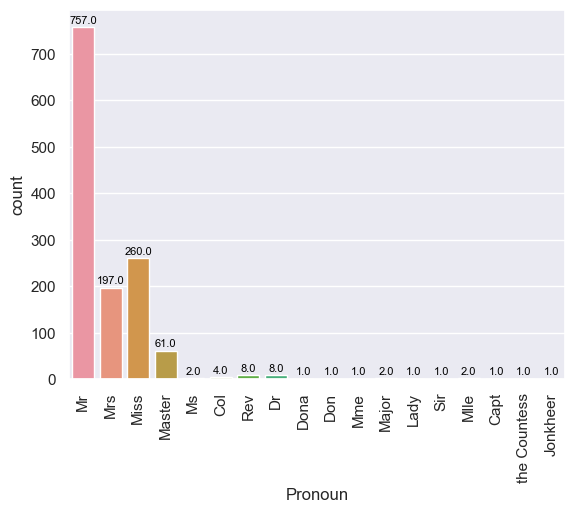

In [7]:
'''
Analisando os números, quatro pronomes de tratamento possuem a esmagadora maioria de participação nos dados
em comparação aos restantes. Essa afirmação pode ser melhor visualizada em um gráfico de barras.
'''

# Plotando gráfico de barras de pronomes de tratamento

colunas_de_pronomes = sns.set(font_scale=1)
colunas_de_pronomes = sns.countplot(data=df_create, x='Pronoun')
colunas_de_pronomes.set_xticklabels(colunas_de_pronomes.get_xticklabels(), rotation=90)

for i in colunas_de_pronomes.patches:
    colunas_de_pronomes.annotate(f'{i.get_height()}', 
                (i.get_x() + i.get_width() / 2., i.get_height()), 
                ha='center', va='center', 
                fontsize=8, color='black', xytext=(0, 5),
                textcoords='offset points')

colunas_de_pronomes